## Purpose: 

Examining the relationship between states with high covid-related death rates and states with high poverty, limited education, and no health insurance. 

In [429]:
import pandas as pd

# TOTAL COVID DEATHS OVER 1 YEAR

In [400]:
#the file located on the desktop is opened and read as df
df = pd.read_csv("/Users/morganchunn/Desktop/time_series_covid19_deaths (states).csv")
#the dataframe is grouped by the coulumn "Province_State" 
num_state = df.groupby("Province_State").sum()
#just the columns between the 2 dates are selected for
num_state_year = num_state.loc[:,"6/1/20":"6/1/21"]
#will find the number of cases between thhe 2 dates
state_num_increase = num_state_year["6/1/21"].sub(num_state_summer['6/1/20'], axis = 0)
#selects for the top top 10 values 
deaths = state_num_increase.sort_values(ascending=False).head(10)
df



Graph depicting the top 10 states with the greatest number of covid related deaths over the span of 1 year

<AxesSubplot:title={'center':'States with Greatest Number of Covid Related Deaths'}, ylabel='State'>

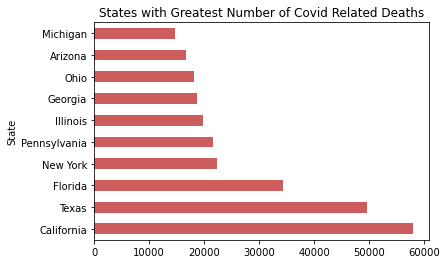

In [401]:
#plots a horizontal bar graph of data represented by deaths variable 
deaths.plot.barh(xlabel="State", title= "States with Greatest Number of Covid Related Deaths", color = "indianred")
                                                                                                                                                                                                                                 

Normilizing Data to use for comparison 

In [403]:
#formula to normalize the data
norm_death_data = (deaths-deaths.min())/(deaths.max()-deaths.min())  
norm_death_data

Province_State
California      1.000000
Texas           0.807728
Florida         0.456240
New York        0.180069
Pennsylvania    0.161384
Illinois        0.119723
Georgia         0.094879
Ohio            0.081361
Arizona         0.047958
Michigan        0.000000
dtype: float64

# HOUSES BELOW POVERTY LINE 

The below cell will show the top 10 states with the highest number of houses below the poverty line. 

In [404]:
poverty_data  = pd.read_csv("/Users/morganchunn/Desktop/Population_and_Poverty_Status (States).csv")
#the poverty data has its index set to "State" and the values are sorted descendingly by the given column name 
pov = poverty_data.set_index("State").sort_values(by="Total Households Below the Poverty Level", ascending=False)
#just the top 10 values pertaining the specific column are selected for 
poverty_households= pov.loc[:,"Total Households Below the Poverty Level"].head(10)



Graph depicting the top 10 states with the greatest number of houses below the poverty line. 

<AxesSubplot:title={'center':'States with Greatest Number of Houses Below the Poverty Line'}, ylabel='State'>

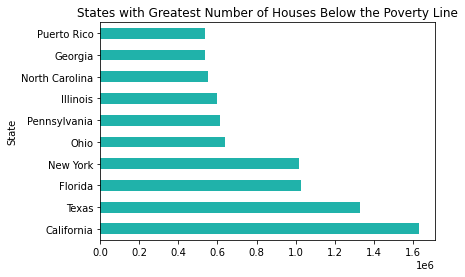

In [405]:
poverty_households.plot.barh(xlabel="State", title= "States with Greatest Number of Houses Below the Poverty Line", color = "lightseagreen")


Normilizing Data to use for comparison 

In [406]:
#formula for normilization
norm_poverty_data = (poverty_households-poverty_households.min())/(poverty_households.max()-poverty_households.min())
norm_poverty_data

State
California        1.000000
Texas             0.725761
Florida           0.450282
New York          0.441601
Ohio              0.095119
Pennsylvania      0.070198
Illinois          0.055990
North Carolina    0.014406
Georgia           0.000056
Puerto Rico       0.000000
Name: Total Households Below the Poverty Level, dtype: float64

# Comparing States with High Covid Related Deaths to States with High Poverty Rates:
This depicts how many of the top 10 states with houses below the poverty line are in the top 10 states with the most covid deaths.

In [407]:
#the top 10 poverty states are selected for by the specific column
compare_pov = poverty_data.sort_values(by="Total Households Below the Poverty Level", ascending=False).head(10)
num_state_summer['Covid Deaths'] = state_num_increase
compare_deaths = num_state_summer.sort_values(by="Covid Deaths", ascending=False).head(10).reset_index()
#if the high poverty state is also a state found in the top 10 states with highest covid deaths, then the result is True
compare_pov['State'].isin(compare_deaths['Province_State']).value_counts()



True     8
False    2
Name: State, dtype: int64

"True" means the state with high poverty is also a state with high covid related deaths. 

Graph depicting the top 10 states with the greatest number of houses below the poverty line. States in red are also in the top 10 states who had the greatest number of covid related deaths. 

<AxesSubplot:title={'center':'States with Greatest Number of Houses Below the Poverty Line'}, ylabel='State'>

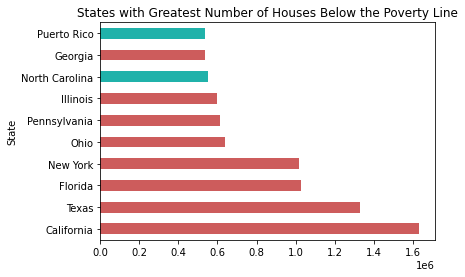

In [408]:
poverty_households.plot.barh(xlabel="State", title= "States with Greatest Number of Houses Below the Poverty Line", color = ['indianred', 'indianred', 'indianred', 'indianred', 'indianred', 'indianred', 'indianred', 'lightseagreen','indianred','lightseagreen'])


Since the majority of states who have high poverty are also states with high covid death rates, there is evidence to suggest high poverty rates could be an aiding factor in higher covid death rates.

# LIMITED EDUCATION

In [409]:
education  = pd.read_csv("/Users/morganchunn/Desktop/Educational_Attainment (states).csv")
#index is set and the data is sorted by the specific column
state_ed= education.set_index("State").sort_values(by="Population 25 years and over - Less than 9th grade", ascending=False)
state_ed_less_9= state_ed.loc[:,"Population 25 years and over - Less than 9th grade"]
#top 10 values from the specific column 
ed = state_ed_less_9.head(10)
ed


State
California        2432994
Texas             1482952
New York           838231
Florida            718909
Illinois           419259
Puerto Rico        358915
Georgia            318461
North Carolina     314545
New Jersey         298624
Pennsylvania       284062
Name: Population 25 years and over - Less than 9th grade, dtype: int64

Graph depicting the top 10 states with limited education. 

<AxesSubplot:title={'center':'Top States with Limited Education'}, ylabel='State'>

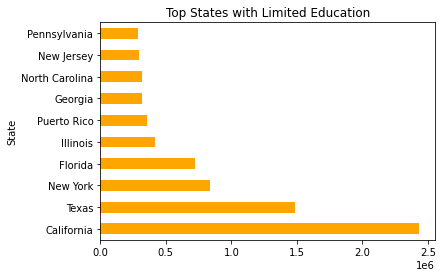

In [410]:
ed.plot.barh(xlabel="State", title= "Top States with Limited Education", color = "orange")


Normilizing Data to use for comparison

In [411]:
#formula for normalization
norm_ed_data = (ed-ed.min())/(ed.max()-ed.min())
norm_ed_data


State
California        1.000000
Texas             0.557900
New York          0.257881
Florida           0.202355
Illinois          0.062914
Puerto Rico       0.034833
Georgia           0.016007
North Carolina    0.014185
New Jersey        0.006776
Pennsylvania      0.000000
Name: Population 25 years and over - Less than 9th grade, dtype: float64

# Comparing States with High Related Covid Deaths to States with Limited Education:
This depicts how many of the top 10 states with limited education amoungst the population are in the top 10 states with the most covid deaths.

In [412]:
compare_edu = education.sort_values(by="Population 25 years and over - Less than 9th grade", ascending=False).head(10)
#if the state with limited education is in the states with high covid deaths, true is the result.. otherwise false is given
compare_edu['State'].isin(compare_deaths['Province_State']).value_counts()


True     7
False    3
Name: State, dtype: int64

"True" means the state with limited education is also a state with high covid related deaths. 

Graph depicting the top 10 states with limited education. States in red are also in the top 10 states who had the greatest number of covid related deaths. 

<AxesSubplot:title={'center':'Top States with Limited Education'}, ylabel='State'>

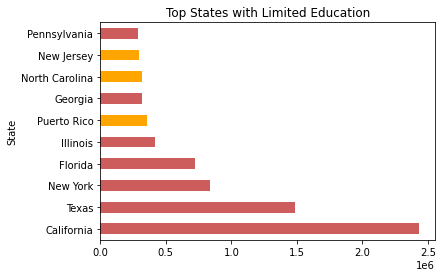

In [413]:
ed.plot.barh(xlabel="State", title= "Top States with Limited Education", color = ['indianred', 'indianred', 'indianred', 'indianred', 'indianred', 'orange', 'indianred', 'orange','orange','indianred'])


Since the majority of states who have limited education amongst the population are also states with high covid death rates, there is evidence to suggest that lack of education could be an aiding factor in higher covid death rates.

# POPULATION WITHOUT HEALTH INSURANCE COVERAGE

In [414]:
insurance  = pd.read_csv("/Users/morganchunn/Desktop/Health_Insurance (States).csv").set_index("State")
#values are sorted descendingly by the specific column name 
insurance.sort_values(by="Total Civilian Noninstitutionalized Population - No health insurance coverage", ascending=False)
without_in= insurance.loc[:,"Total Civilian Noninstitutionalized Population - No health insurance coverage"]
ins = without_in.sort_values(ascending=False).head(10)


Graph depicting the top 10 states with the greatest number of uninsured individuals. 

<AxesSubplot:title={'center':'Top States with Limited Insurance Coverage Amongst the Population'}, ylabel='State'>

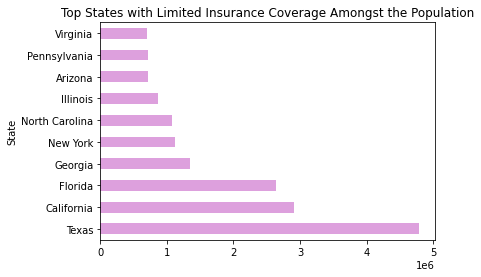

In [415]:
ins.plot.barh(xlabel="State", title= "Top States with Limited Insurance Coverage Amongst the Population", color = "plum")


Normilizing Data to use for Comparison 

In [416]:
norm_in_data = (ins-ins.min())/(ins.max()-ins.min())
norm_in_data


State
Texas             1.000000
California        0.540534
Florida           0.472499
Georgia           0.157508
New York          0.100215
North Carolina    0.090379
Illinois          0.037140
Arizona           0.003817
Pennsylvania      0.001794
Virginia          0.000000
Name: Total Civilian Noninstitutionalized Population - No health insurance coverage, dtype: float64

# Comparing States with High Covid Related Deaths to States without Health Insurance:
This depicts how many of the top 10 states without health insurance are in the top 10 states with the most covid deaths.


In [417]:
com_ins = insurance.sort_values(by="Total Civilian Noninstitutionalized Population - No health insurance coverage", ascending=False).head(10)
compare_ins = com_ins.reset_index()
#if the low insurance coverage state is also a state with high covid deaths, true is returned 
compare_ins['State'].isin(compare_deaths['Province_State']).value_counts()


True     8
False    2
Name: State, dtype: int64

"True" means the state with limited insurance coverage is also a state with high covid related deaths. 

Graph depicting the top 10 states with the greatest number of uninsured individuals. States in red are also in the top 10 states who had the greatest number of covid related deaths.

<AxesSubplot:title={'center':'Top States with Limited Insurance Coverage Amongst the Population'}, ylabel='State'>

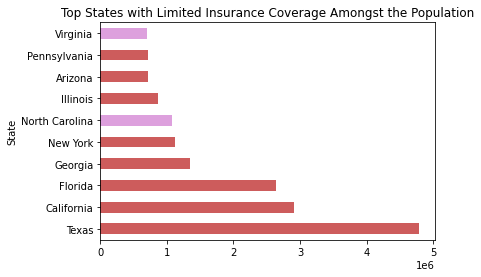

In [418]:
ins.plot.barh(xlabel="State", title= "Top States with Limited Insurance Coverage Amongst the Population", color = ['indianred', 'indianred', 'indianred', 'indianred', 'indianred', 'plum', 'indianred', 'indianred','indianred','plum'])


Since the majority of states who have limited health insurance amongst the population are also states with high covid death rates, there is evidence to suggest like lack of health insurance could be an aiding factor in higher covid death rates.

# Viewing the data in tabulated form:


# How the top 10 States in Covid Deaths compare to top 10 States Below Poverty line 

In [419]:
combined  = pd.read_csv("/Users/morganchunn/Desktop/combined_data.csv")
#multiple columns are selected for and sorted by one specific column
pov_deaths = combined.iloc[:,[0,1,2]].sort_values(by="Total Covid deaths over 1 Year", ascending = False).set_index('State')
pov_deaths



,Total Covid deaths over 1 Year,Houses Below Poverty Line
State,,
California,57981.0,1632747.0
Texas,49646.0,1331757.0
Florida,34409.0,1029407.0
New York,22437.0,1019879.0
Pennsylvania,21627.0,612247.0
Illinois,19821.0,596654.0
Georgia,18744.0,535264.0
Ohio,18158.0,639599.0
Arizona,16710.0,NaN


Plot showing normalization of the above data. 

<AxesSubplot:xlabel='State'>

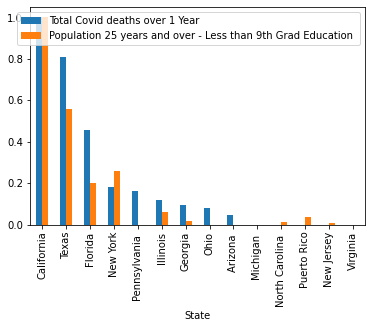

In [420]:
normilized_pov = normilized_com_all.iloc[:,[0,2]]
#bar plot of the normalized data
normilized_pov.plot.bar()

# How the top 10 States in Covid Deaths compare to top 10 States with limited Education  


In [421]:
#multiple columns are selected for by their position
edu_deaths=combined.iloc[:,[0,1,3]] 
edu_deaths

,State,Total Covid deaths over 1 Year,Population 25 years and over - Less than 9th Grad Education
0,California,57981.0,2432994.0
1,Texas,49646.0,1482952.0
2,Florida,34409.0,718909.0
3,New York,22437.0,838231.0
4,Pennsylvania,21627.0,284062.0
5,Illinois,19821.0,419259.0
6,Georgia,18744.0,318461.0
7,Ohio,18158.0,NaN
8,Arizona,16710.0,NaN
9,Michigan,14631.0,NaN


Plot showing normalization of the above data. 

<AxesSubplot:xlabel='State'>

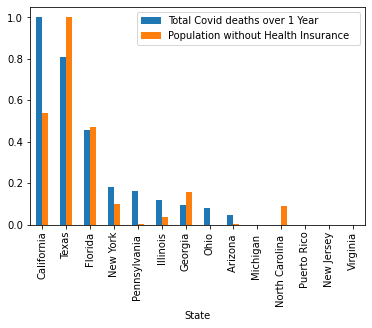

In [422]:
normilized_edu = normilized_com_all.iloc[:,[0,3]]
normilized_edu.plot.bar()

# How the top 10 States in Covid Deaths over a year compare to the top 10 States lacking in Heath Insurance  

In [423]:
ins_deaths = combined.iloc[:,[0,1,4]]
ins_deaths


,State,Total Covid deaths over 1 Year,Population without Health Insurance
0,California,57981.0,2915070.0
1,Texas,49646.0,4791164.0
2,Florida,34409.0,2637268.0
3,New York,22437.0,1117159.0
4,Pennsylvania,21627.0,715285.0
5,Illinois,19821.0,859612.0
6,Georgia,18744.0,1351097.0
7,Ohio,18158.0,NaN
8,Arizona,16710.0,723547.0
9,Michigan,14631.0,NaN


Plot showing normalization of the above data. 

<AxesSubplot:xlabel='State'>

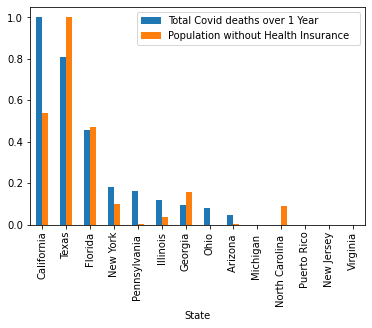

In [424]:
normilized_ins = normilized_com_all.iloc[:,[0,3]]
normilized_ins.plot.bar()

# Combined Data
Top 10 States from each category 

In [425]:
com_all = pd.read_csv("/Users/morganchunn/Desktop/combined_data.csv").set_index("State")
com_all

,Total Covid deaths over 1 Year,Houses Below Poverty Line,Population 25 years and over - Less than 9th Grad Education,Population without Health Insurance
State,,,,
California,57981.0,1632747.0,2432994.0,2915070.0
Texas,49646.0,1331757.0,1482952.0,4791164.0
Florida,34409.0,1029407.0,718909.0,2637268.0
New York,22437.0,1019879.0,838231.0,1117159.0
Pennsylvania,21627.0,612247.0,284062.0,715285.0
Illinois,19821.0,596654.0,419259.0,859612.0
Georgia,18744.0,535264.0,318461.0,1351097.0
Ohio,18158.0,639599.0,NaN,NaN
Arizona,16710.0,NaN,NaN,723547.0


Below is the data normalized. The is done so all data can be observed from theh same scale. 

In [426]:
normilized_com_all = pd.read_csv("/Users/morganchunn/Desktop/normilized_data.csv").set_index("State")
normilized_com_all            
                                 

,Total Covid deaths over 1 Year,Houses Below Poverty Line,Population 25 years and over - Less than 9th Grad Education,Population without Health Insurance
State,,,,
California,1.000000,1.000000,1.000000,0.540534
Texas,0.807728,0.725761,0.557900,1.000000
Florida,0.456240,0.450282,0.202355,0.472499
New York,0.180069,0.441601,0.257881,0.100215
Pennsylvania,0.161384,0.070198,0.000000,0.001794
Illinois,0.119723,0.055990,0.062914,0.037140
Georgia,0.094879,0.000056,0.016007,0.157508
Ohio,0.081361,0.095119,NaN,NaN
Arizona,0.047958,NaN,NaN,0.003817


Plot showing normalization of the above data. 

<AxesSubplot:xlabel='State'>

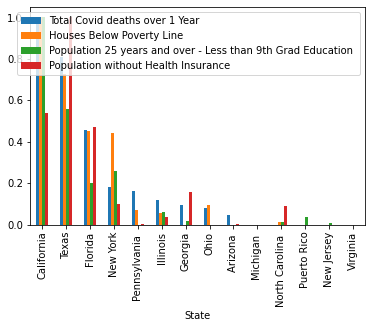

In [427]:
normilized_com_all.plot.bar()

# Comparing top states with high covid deaths to top states exhibiting no health insurance, limited education, and high poverty

To compare whether or not each condition (no health insurance, limited education, high poverty) had correlation with high covid death rates, the top ten states exhibiting each condition were selected for. Those ten states are then compared to the top 10 states with the most covid related deaths. If there is overlap, there is evidence to believe the given conditon is an aiding factor in higher covid death rates. 

<AxesSubplot:ylabel='Condition'>

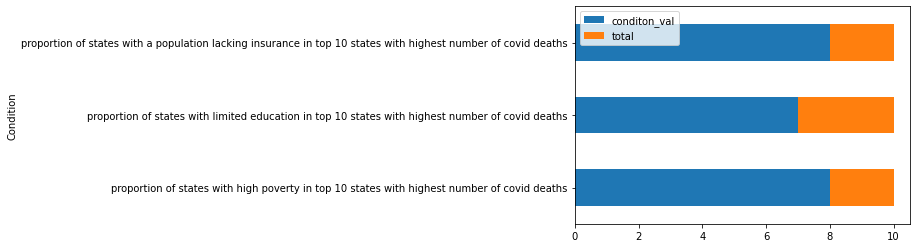

In [428]:
#creates a simple dataframe to show true/false data
propotion_data = pd.DataFrame({'Condition': ['proportion of states with high poverty in top 10 states with highest number of covid deaths', 'proportion of states with limited education in top 10 states with highest number of covid deaths', 'proportion of states with a population lacking insurance in top 10 states with highest number of covid deaths'], 'conditon_val':[8,7,8], 'total': [2,3,2]})
#"Condition" is set as the data index and a horizontal, stacked bar graph is made
propotion_data.set_index("Condition").plot.barh(stacked=True)

                                             

The above graph shows there is significant overlap between states with the highest covid related deaths and states exhibiting the given condition. 